In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
beta = 4.5
sdim = 64

In [ ]:
# Set Seed
np.random.seed(117);

In [ ]:
# Build power spectrum 
f = [x/sdim for x in range(1, int(sdim/2)+1)] + [x/sdim for x in range(-int(sdim/2), 0)]
u = np.reshape(f, (sdim, 1))
v = np.reshape(f, (1, sdim))
w = np.reshape(f, (sdim, 1, 1))
powerspectrum = (u**2 + v**2 + w**2)**(-beta/2)

In [ ]:
# Noise and ifft
phases = np.random.normal(0, 255, size=[sdim, sdim, sdim]);
complexpattern = np.fft.ifftn(powerspectrum**0.5 * (np.cos(2*np.pi*phases)+1j*np.sin(2*np.pi*phases)))

In [ ]:
# Normalize result
realpattern = np.real(complexpattern)
realpattern = (realpattern-np.amin(realpattern))/np.amax(realpattern-np.amin(realpattern))

In [ ]:
# Create vectors for 3d plot
z, x, y = realpattern.nonzero()
color = realpattern.flatten()
color = color[:-1]

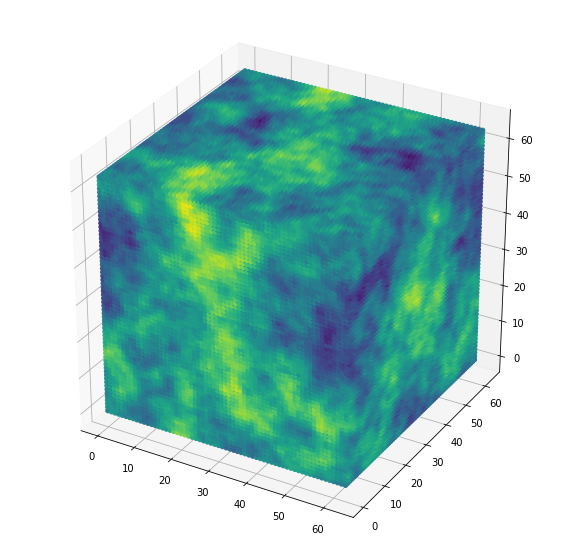

In [ ]:
# Display 3d Fractal
fig = plt.figure()
plt.rcParams["figure.figsize"]=10,10
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, alpha=1)
plt.show()

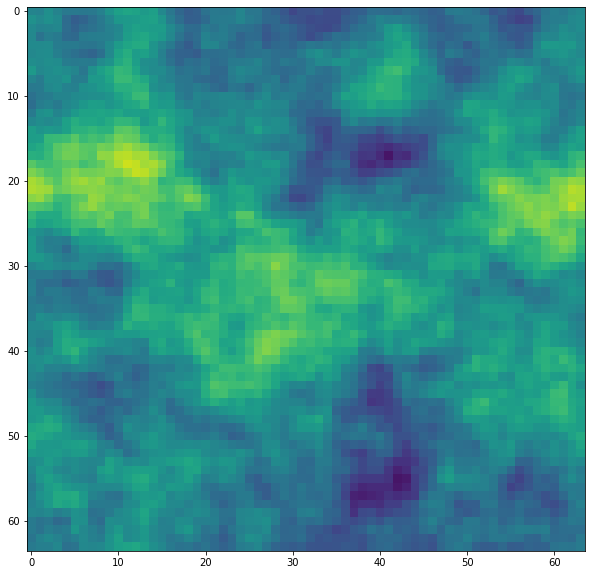

In [ ]:
# Display Top slice
plt.imshow(realpattern[-1,:,:], vmin=0, vmax=1, aspect='auto')